In [82]:
import numpy as np
import pandas as pd
import math
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_station = pd.read_csv("Processed Data/Divvy_Bicycle_Stations_-_Historical_hourly.csv")

C:\Users\mgambh2\AppData\Local\Temp\ipykernel_44784\107654885.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_station = pd.read_csv("Processed Data/Divvy_Bicycle_Stations_-_Historical_hourly.csv")


In [3]:
df_nearby = pd.read_csv("Processed Data/GetNearestBusAndTrainStation.csv")

In [18]:
df_nearby[df_nearby['nearest_train_station_distance'].isna()]

,ID,Station Name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location,nearest_train_station_name,nearest_train_station_distance,nearest_bus_station_name,nearest_bus_station_distance


In [4]:
df_combined = df_station.merge(df_nearby[["Station Name","nearest_train_station_name","nearest_train_station_distance","nearest_bus_station_name","nearest_bus_station_distance"]],how="left",on="Station Name")
df_combined['Timestamp'] = pd.to_datetime(df_combined['Timestamp'])
df_combined['hour'] = df_combined['Timestamp'].dt.hour

In [5]:
del df_station

In [23]:
df_combined

,ID,Timestamp,Station Name,Address,Total Docks,Docks in Service,Available Docks,Available Bikes,Percent Full,Status,Latitude,Longitude,nearest_train_station_name,nearest_train_station_distance,nearest_bus_station_name,nearest_bus_station_distance,hour
0,2,2018-01-01 00:05:13,Buckingham Fountain,Buckingham Fountain,27.0,27.0,23.0,4.0,15.0,In Service,41.876393,-87.620328,Adams/Wabash,0.583995,Ida B Wells Drive & Michigan,0.312658,0
1,3,2018-01-01 00:05:13,Shedd Aquarium,Shedd Aquarium,55.0,55.0,47.0,8.0,15.0,In Service,41.867226,-87.615355,Roosevelt,0.932939,Solidarity Drive & Aquarium,0.168747,0
2,4,2018-01-01 00:05:13,Burnham Harbor,Burnham Harbor,23.0,23.0,17.0,6.0,26.0,In Service,41.856268,-87.613348,Cermak-McCormick Place,1.150778,Cermak & Prairie,0.761036,0
3,5,2018-01-01 00:05:13,State St & Harrison St,State St & Harrison St,23.0,23.0,17.0,6.0,26.0,In Service,41.874053,-87.627716,Harrison,0.019736,State & Harrison/Ida B Wells Drive,0.094727,0
4,6,2018-01-01 00:05:13,Dusable Harbor,Dusable Harbor,39.0,39.0,28.0,11.0,28.0,In Service,41.885041,-87.612794,Washington/Wabash,1.185999,Harbor Drive & Randolph,0.291615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29444428,1715846713038684540,2022-09-10 18:05:56,Public Rack - Komensky Ave & 26th St,NaN,1.0,1.0,1.0,0.0,0.0,In Service,41.844168,-87.726317,Pulaski,1.075260,26th Street & Karlov,0.024871,18
29444429,1715846714090947442,2022-09-10 18:05:56,Public Rack - Pulaski Rd & Grenshaw St,NaN,1.0,1.0,1.0,0.0,0.0,In Service,41.867028,-87.725464,Pulaski,0.752030,Pulaski & Fillmore,0.078398,18
29444430,1715846717333651852,2022-09-10 18:05:56,Public Rack - Washington Park Ct & 51st St,NaN,2.0,2.0,2.0,0.0,0.0,In Service,41.802192,-87.615144,51st,0.278023,51st Street & King Drive,0.027921,18
29444431,1715846718385914740,2022-09-10 18:05:56,Public Rack - Lawndale Ave & 23rd St,NaN,2.0,2.0,1.0,1.0,50.0,In Service,41.849956,-87.716712,Central Park,0.458392,Central Park & 23rd Street,0.141240,18


In [26]:
df_combined_grouped = df_combined.groupby(['Station Name','hour'],as_index=False)['Docks in Service','Available Docks','Available Bikes',
       'Percent Full','nearest_train_station_distance','nearest_bus_station_distance'].mean()

C:\Users\mgambh2\AppData\Local\Temp\ipykernel_44784\3930291380.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_combined_grouped = df_combined.groupby(['Station Name','hour'],as_index=False)['Docks in Service','Available Docks','Available Bikes',


In [32]:
df_combined_grouped = df_combined_grouped[~df_combined_grouped['nearest_bus_station_distance'].isna()].reset_index(drop=True)

In [55]:
df_combined_grouped[['nearest_train_station_distance','nearest_bus_station_distance']] = df_combined_grouped[['nearest_train_station_distance','nearest_bus_station_distance']]*0.621

In [56]:
df_combined_grouped.head()

,Station Name,hour,Docks in Service,Available Docks,Available Bikes,Percent Full,nearest_train_station_distance,nearest_bus_station_distance
0,2112 W Peterson Ave,0,11.316373,5.050367,6.266007,55.993253,1.263182,0.047157
1,2112 W Peterson Ave,1,11.318557,5.007240,6.311317,56.406845,1.263182,0.047157
2,2112 W Peterson Ave,2,11.317118,4.980950,6.336168,56.660298,1.263182,0.047157
3,2112 W Peterson Ave,3,11.316428,4.938717,6.377710,56.991125,1.263182,0.047157
4,2112 W Peterson Ave,4,11.313753,4.865554,6.448198,57.578645,1.263182,0.047157


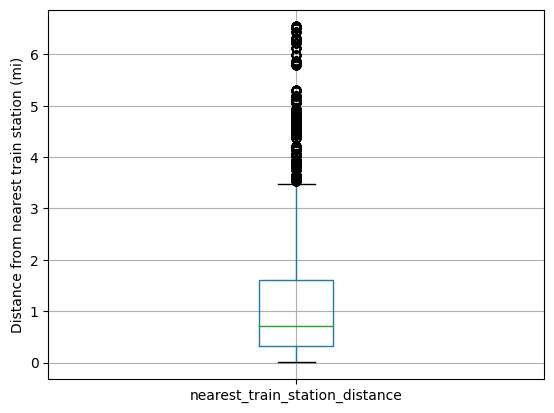

In [60]:
df_combined_grouped[['nearest_train_station_distance']].boxplot()
plt.ylabel("Distance from nearest train station (mi)");

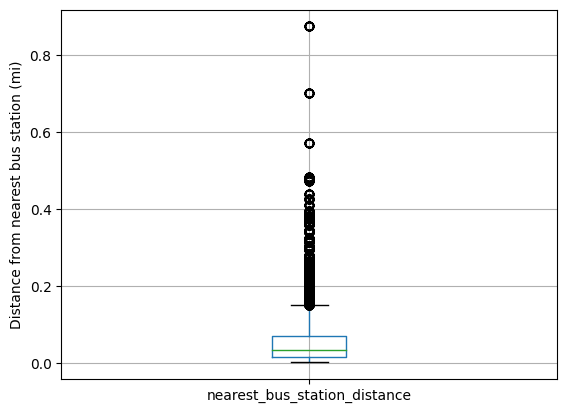

In [61]:
df_combined_grouped[['nearest_bus_station_distance']].boxplot()
plt.ylabel("Distance from nearest bus station (mi)");

In [101]:
df_combined_grouped['bus_q'] = pd.qcut(df_combined_grouped['nearest_bus_station_distance'],4,labels=['0.0003699-0.0162','0.0162-0.0346','0.0346-0.0696','0.0696-0.875'])
df_combined_grouped['train_q'] = pd.qcut(df_combined_grouped['nearest_train_station_distance'],4,labels=['0.00253-0.33','0.33-0.715','0.715-1.608','1.608-6.543'])

In [102]:
df_combined_grouped

,Station Name,hour,Docks in Service,Available Docks,Available Bikes,Percent Full,nearest_train_station_distance,nearest_bus_station_distance,bus_q,train_q
0,2112 W Peterson Ave,0,11.316373,5.050367,6.266007,55.993253,1.263182,0.047157,0.0346-0.0696,0.715-1.608
1,2112 W Peterson Ave,1,11.318557,5.007240,6.311317,56.406845,1.263182,0.047157,0.0346-0.0696,0.715-1.608
2,2112 W Peterson Ave,2,11.317118,4.980950,6.336168,56.660298,1.263182,0.047157,0.0346-0.0696,0.715-1.608
3,2112 W Peterson Ave,3,11.316428,4.938717,6.377710,56.991125,1.263182,0.047157,0.0346-0.0696,0.715-1.608
4,2112 W Peterson Ave,4,11.313753,4.865554,6.448198,57.578645,1.263182,0.047157,0.0346-0.0696,0.715-1.608
...,...,...,...,...,...,...,...,...,...,...
34051,Yates Blvd & 93rd St,19,14.335217,8.593691,5.741525,39.975989,3.011729,0.025587,0.0162-0.0346,1.608-6.543
34052,Yates Blvd & 93rd St,20,14.327213,8.636064,5.691149,39.649718,3.011729,0.025587,0.0162-0.0346,1.608-6.543
34053,Yates Blvd & 93rd St,21,14.324859,8.640772,5.684087,39.608757,3.011729,0.025587,0.0162-0.0346,1.608-6.543
34054,Yates Blvd & 93rd St,22,14.322976,8.661959,5.661017,39.459981,3.011729,0.025587,0.0162-0.0346,1.608-6.543


In [103]:
df_bus_q = df_combined_grouped.groupby(['hour','bus_q'],as_index=False)[['Docks in Service','Available Docks','Available Bikes','Percent Full']].mean()
df_train_q = df_combined_grouped.groupby(['hour','train_q'],as_index=False)[['Docks in Service','Available Docks','Available Bikes','Percent Full']].mean()

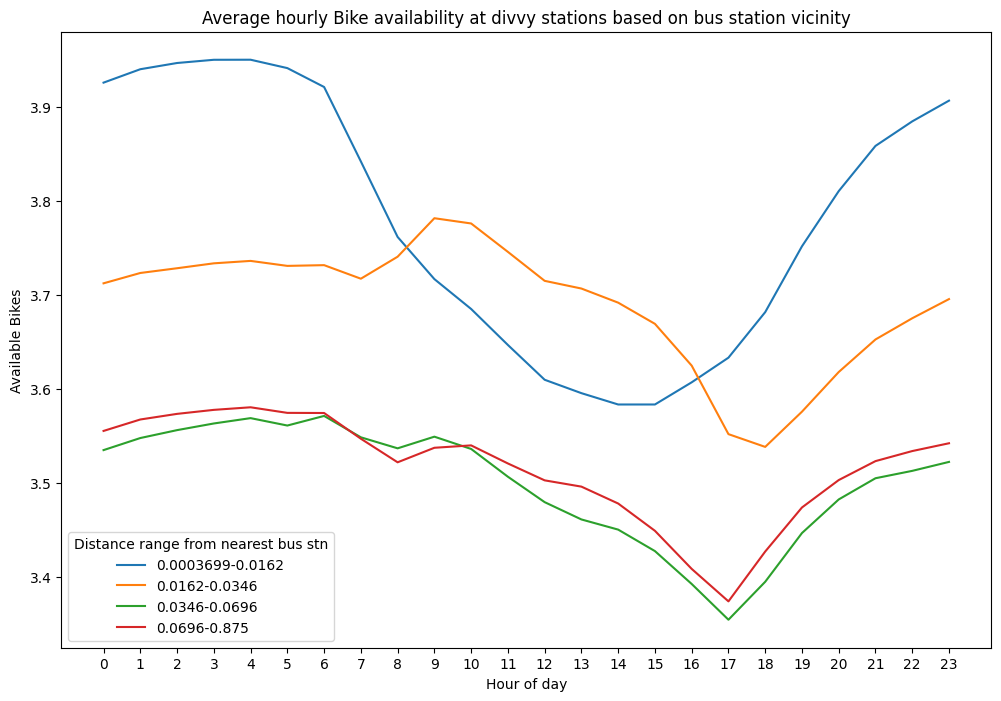

In [119]:
plt.figure(figsize=(12,8))
sns.lineplot(x='hour', y='Available Bikes', data=df_bus_q, hue='bus_q')
plt.xticks(np.arange(24))
plt.legend(title="Distance range from nearest bus stn")
plt.xlabel('Hour of day')
plt.title("Average hourly Bike availability at divvy stations based on bus station vicinity");

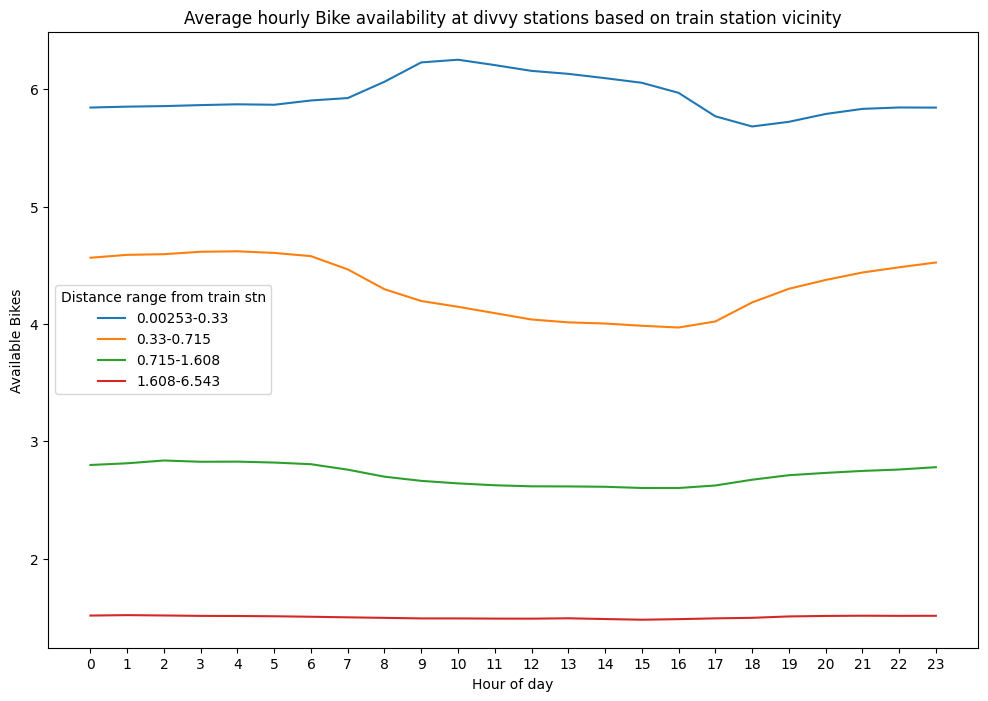

In [120]:
plt.figure(figsize=(12,8))
sns.lineplot(x='hour', y='Available Bikes', data=df_train_q, hue='train_q')
plt.xticks(np.arange(24))
plt.legend(title="Distance range from train stn");
plt.xlabel('Hour of day')
plt.title("Average hourly Bike availability at divvy stations based on train station vicinity");